In [2]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
import pandas as pd
from data_analysis_codes.tools import LinData

In [2]:
CTD = ['pflrw_d3e2_L1206_t1_N128_EdS', 
       'pflrw_d3e2_L1206_t1_N64_EdS', 
       'pflrw_d3e2_L1206_t1_N32_EdS', 
       
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_sync',  
       This showed that my thorn works with synchronous
       
       
       'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mK', 
       'pflrw_d3e2_L1206_t1_N64_EdS_CLPT_mK', 
       'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKav', annoying to edit the code after Kranc generation, not worthwhile
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_mK', 
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_mKin', waste of memory
       Different variations of lapse evolution       
       
       
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_mKinn',
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_mKn',
       normalising didn't work because lapse in UD decreases
       
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_afrho', 
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_afrho1', 
       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_afrho2', 
       Would have been nice but constraints blew up, CFL instability appeared
              
       'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_Puncture', 
       ML_BSSN puncture evolution, lapse in OD grows
       
        --> 'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc', 
        --> 'pflrw_d3e2_L1206_t1_N64_EdS_CLPT_mKPunc', 
       
       'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc_0driver', 
       'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc_10driver', 
       'pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc_1e4driver', 
       cosmo lapse evo and ML_BSSN shift evo
       changing the parameters didn't fix things       

       'pflrw_d3e2_L1206_t1_N32_EdS_nCL_Puncture', 
       'pflrw_d3e2_L1206_t1_N32_EdS_nnCL_Puncture', 
       Puncture gauge but beta evolved with my thorn
       Lapse in OD grows
       
       'pflrw_d3e2_L1206_t1_N32_EdS_nnCL_CosmoPuncture', 
       best set up
       
       
       'pflrw_d3e2_L1206_t1_N32_EdS_nnCL_20CosmoPuncture', 
       changed lapse evo factor from 2 to 20, it just changed the OD UD lapse fluctuation more
 ]

# +        'pflrw_d3e2_L1206_t1_N32_EdS_nCL_afrho3', 

GRH = ['pflrw_d3e2_L1206_t1_N32_EdS_GRH', 
       
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_CL', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_CL_mINK', 
       
       'pflrw_d3e2_L1206_t1_N16_EdS_GRH_CLPT', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_CLPT', 
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_CLPT', 
       
       'pflrw_d3e2_L1206_t1_N16_EdS_GRH_CLPT_mK', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_CLPT_mK', 
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_CLPT_mK', 
       'pflrw_d3e2_L1206_t1_N128_EdS_GRH_CLPT_mK', 
       
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_CosmoPunctureTRY', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_CPunc_MR_CP', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_mKPunc', 
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_mKPunc', 
       'pflrw_d3e2_L1206_t1_N128_EdS_GRH_mKPunc', 
       
       'pflrw_d3e2_L1206_t1_N16_EdS_GRH_Puncture',
       'pflrw_d3e2_L1206_t1_N32_EdS_GRH_Puncture', 
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_Puncture', 
       'pflrw_d3e2_L1206_t1_N128_EdS_GRH_Puncture',
       
       'pflrw_d3e2_L1206_t1_N32_EdS_GRHsharp2_CosmoPunctureTRY', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRHsharp2e3_CosmoPunctureTRY', 
       'pflrw_d3e2_L1206_t1_N32_EdS_GRHsharp_CosmoPunctureTRY',
       
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_CPunc_MR', 
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_CPunc_MR_copytime', 
       'pflrw_d3e2_L1206_t1_N64_EdS_GRH_CPunc_MR_CP',  ]


spin = ['pflrw_d3e2_L1206_t1_N32_EdS_spin_CosmoPuncture', 
        'pflrw_d3e2_L1206_t1_N64_EdS_spin_CosmoPuncture', 
        'pflrw_d3e2_L1206_t1_N128_EdS_spin_CosmoPuncture', 
        
        'pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CosmoPuncture', 
        'pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CosmoPuncture', 
        'pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CosmoPunctureTRY', 
        
        'pflrw_d3e2_L1206_t1_N32_EdS_GRHsharpnoatm_spin_CosmoPuncture', 
        'pflrw_d3e2_L1206_t1_N32_EdS_GRHsharp_spin_CosmoPuncture', 
        
        'pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CPunc_MR', 
        'pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CPunc_MR', 
        'pflrw_d3e2_L1206_t1_N96_EdS_GRH_spin_CPunc_MR',
        'pflrw_d3e2_L1206_t1_N128_EdS_GRH_spin_CPunc_MR', ]

Text(0.5, 0, '$a/a_{IN}$')

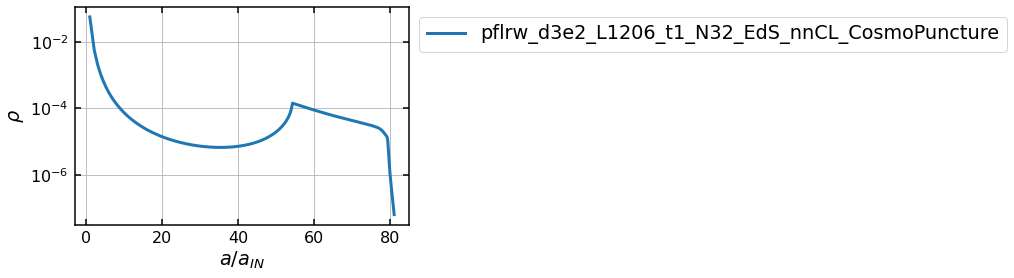

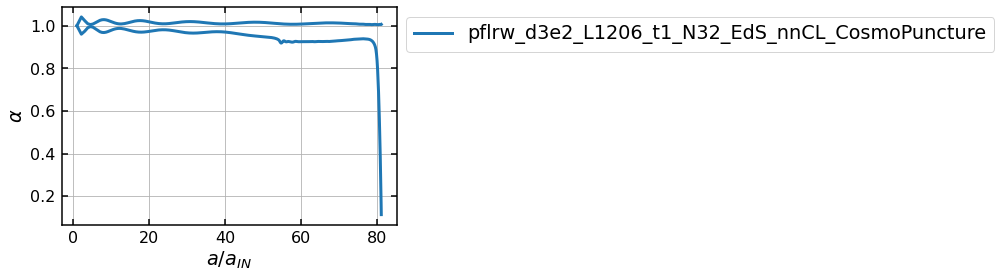

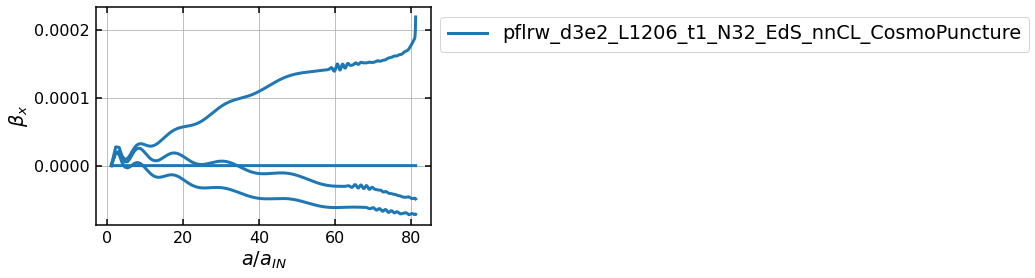

In [9]:
CTD = ['pflrw_d3e2_L1206_t1_N32_EdS_nnCL_CosmoPuncture']

plt.figure()
for simname in CTD:
    param = RRead.read_parameters(simname)
    f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
    if 'rho_OD' in allkeys:
        varname = 'rho_OD'
    if 'rho_u_OD' in allkeys:
        varname = 'rho_u_OD'
    if 'an' in allkeys:
        time = f['an']
    elif 'an_OD' in allkeys:
        time = f['an_OD']
    else:
        Lin = LinData.LinData_Class(param)
        time = Lin.an_initial(f['t'])
    try:
        plt.semilogy(time, f[varname], label=simname)
    except:
        print(simname, allkeys)
        print()
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.ylabel(r'$\rho$')
plt.xlabel(r'$a/a_{IN}$')

plt.figure()
for i,simname in enumerate(CTD):
    param = RRead.read_parameters(simname)
    f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
    allkeys = list(f.keys())
    if 'an' in allkeys:
        time = f['an']
    elif 'an_OD' in allkeys:
        time = f['an_OD']
    else:
        Lin = LinData.LinData_Class(param)
        time = Lin.an_initial(f['t'])
    if simname!='pflrw_d3e2_L1206_t1_N128_EdS':
        try:
            plt.plot(time, f['alpha_OD'], color='C'+str(i), label=simname)
            plt.plot(time, f['alpha_UD'], color='C'+str(i))
        except:
            try:
                plt.plot(time, f['alp_OD'], color='C'+str(i), label=simname)
                plt.plot(time, f['alp_UD'], color='C'+str(i))
            except:
                print(simname, allkeys)
                print()
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$a/a_{IN}$')


plt.figure()
for i,simname in enumerate(CTD):
    if i==0:
        ls = '-'
    elif i==1:
        ls = '--'
    else:
        ls = ':'
    param = RRead.read_parameters(simname)
    f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
    allkeys = list(f.keys())
    if 'an' in allkeys:
        time = f['an']
    elif 'an_OD' in allkeys:
        time = f['an_OD']
    else:
        Lin = LinData.LinData_Class(param)
        time = Lin.an_initial(f['t'])
    if simname!='pflrw_d3e2_L1206_t1_N128_EdS':
        try:
            plt.plot(time, f['betax_midOD'], color='C'+str(i), linestyle=ls, label=simname)
            plt.plot(time, f['betax_cent'], color='C'+str(i), linestyle=ls)
            plt.plot(time, f['betax_midUD'], color='C'+str(i), linestyle=ls)
            plt.plot(time, f['betax_F'], color='C'+str(i), linestyle=ls)
        except:
            print(simname, allkeys)
            print()
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.ylabel(r'$\beta_x$')
plt.xlabel(r'$a/a_{IN}$')

In [3]:
1206/16

75.375